In [21]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [23]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [24]:
coverage_df

,1.0,2.0,3.0,4.0,5.0,Tree val,Naive
0,1.000000,0.800000,0.800000,0.666667,0.600000,1.000000,0.500000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000
2,1.000000,0.833333,0.666667,1.000000,0.714286,1.000000,0.666667
3,1.000000,0.833333,0.833333,0.800000,1.000000,1.000000,0.600000
4,0.800000,1.000000,0.800000,0.666667,1.000000,0.666667,0.500000
...,...,...,...,...,...,...,...
45,0.333333,0.833333,0.833333,1.000000,0.666667,1.000000,0.666667
46,0.800000,1.000000,0.666667,0.833333,1.000000,1.000000,0.600000
47,0.600000,0.800000,0.800000,0.833333,0.500000,1.000000,0.833333
48,0.666667,0.833333,0.666667,0.666667,1.000000,1.000000,0.666667


In [25]:
length_df

,1.0,2.0,3.0,4.0,5.0,Tree val,Naive
0,2.757426,2.927362,1.976556,1.709739,1.624456,14.243634,1.630530
1,3.021338,2.963215,1.695697,1.770717,1.740678,10.790109,1.477125
2,3.366441,1.968552,2.837126,1.924628,1.835280,10.943706,1.649330
3,2.531854,2.054615,1.805594,1.553167,6.400233,13.298423,1.569449
4,2.553495,1.862361,1.774153,1.821508,17.301863,45.283918,1.707690
...,...,...,...,...,...,...,...
45,2.462257,2.015607,1.973282,2.278640,1.684579,6.969904,1.696907
46,2.716216,1.976289,1.818041,1.730426,1.560395,9.083129,1.478546
47,2.466641,1.922705,2.074614,1.704148,4.026108,7.952253,1.688231
48,2.219078,1.785252,1.681642,1.696926,1.912962,11.072240,1.694941


In [26]:
MSE_df

,1.0,2.0,3.0,4.0,5.0,Tree val,Naive
0,5.789406,6.583411,6.181235,5.288654,7.200248,5.069585,5.069585
1,4.444075,4.776577,5.051619,6.021422,5.967864,5.313902,5.313902
2,5.934965,5.442028,5.673112,5.550588,5.961486,6.288812,6.288812
3,6.050955,5.192064,6.267350,5.991706,7.300746,6.104703,6.104703
4,4.562559,4.772185,5.182643,4.645231,5.609289,4.267049,4.267049
...,...,...,...,...,...,...,...
45,4.038409,4.259902,5.045148,3.862667,7.172564,4.309455,4.309455
46,4.636787,5.291724,5.055690,5.465749,5.166399,4.963388,4.963388
47,5.179300,5.267963,5.540369,5.516611,5.423850,4.839165,4.839165
48,5.278909,4.533181,4.763110,5.042625,4.710708,5.494129,5.494129


In [27]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 1.0         0.885162
2.0         0.866638
3.0         0.854924
4.0         0.875405
5.0         0.872195
Tree val    0.916514
Naive       0.639895
dtype: float64
Length :
 1.0          4.227866
2.0          3.173398
3.0          3.230863
4.0          3.130643
5.0          2.932888
Tree val    39.479257
Naive        1.668332
dtype: float64
MSE :
 1.0         5.097379
2.0         5.181806
3.0         5.282813
4.0         5.329672
5.0         5.435019
Tree val    5.187819
Naive       5.187819
dtype: float64


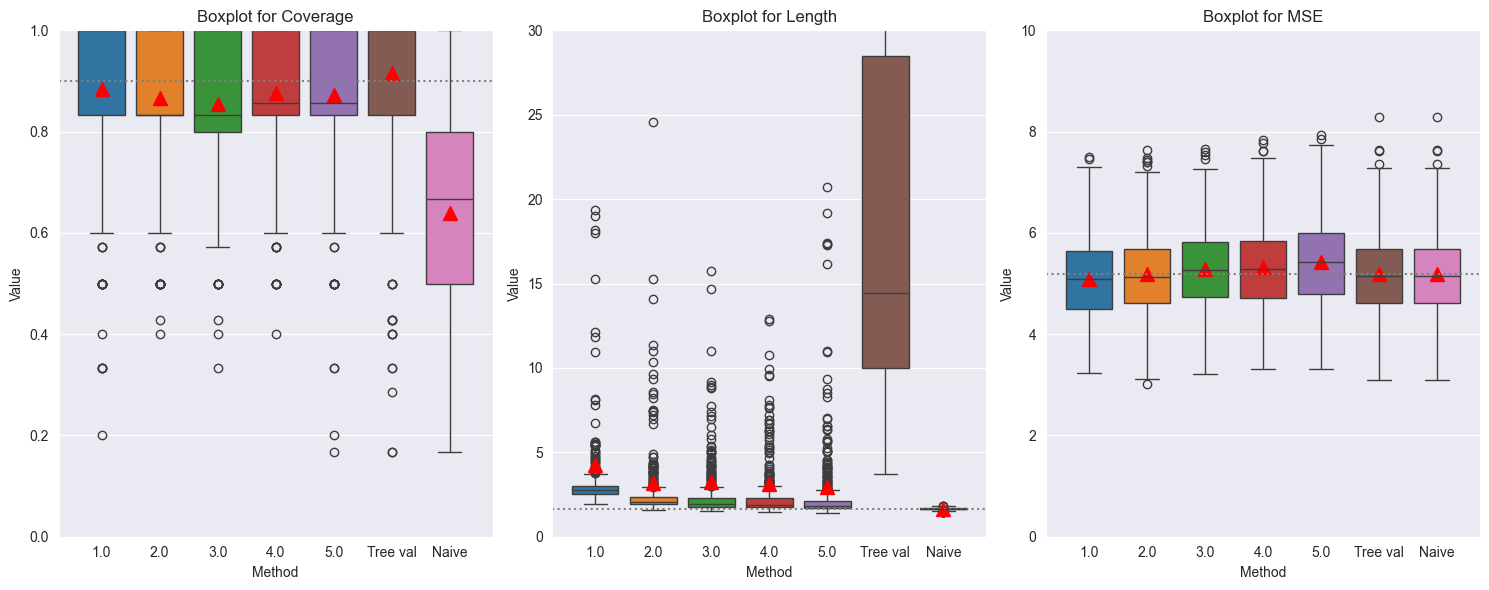

In [30]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=30,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"])

In [ ]:
# TODO: Case 1 with 1, 5, 10